## Imports

In [1]:
############ TORCH ############
import torch
# MNIST dataset imports
import torchvision
from torch.utils.data import DataLoader
# Neural Network import
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

############ OTHERS ############
# visulization
import matplotlib.pyplot as plt

## Set up

In [2]:
n_epochs         = 8
batch_size_train = 60
batch_size_test  = 1000
learning_rate    = 0.01
momentum         = 0.5
log_interval     = 50
random_seed      = 1
torch.manual_seed(random_seed)

## Load dataset

In [3]:
TRANS = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
        (0.1307,), (0.3081,))])

############## Train Dataset ##############
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
    root       = './data/', 
    train      = True, 
    download   = True,
    transform  = TRANS),
    batch_size   = batch_size_train, 
    shuffle      = True)
############################################

############## Test Dataset ##############
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
    root       = './data/', 
    train      = False, 
    download   = True,
    transform  = TRANS),
    batch_size = batch_size_test,
   shuffle     = True)
###########################################

## Structure Neural Network

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

network = Net()
network

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

## Optimizer

In [5]:
optimizer = optim.SGD(network.parameters(), lr=learning_rate,momentum=momentum)

## Loss Function

In [6]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

## Training function

In [7]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './model.pth')
      torch.save(optimizer.state_dict(), './optimizer.pth')

## Test function

In [8]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

## Training procedure

In [9]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/tmp/ipykernel_19121/1774042229.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/home/undergraduate/miniconda3/envs/pytorch/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3316, Accuracy: 1137/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.365627
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.194912
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.018980
Train Epoch: 1 [9000/60000 (15%)]	Loss: 1.358918
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.297726
Train Epoch: 1 [15000/60000 (25%)]	Loss: 1.068846
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.777074
Train Epoch: 1 [21000/60000 (35%)]	Loss: 1.058849
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.616015
Train Epoch: 1 [27000/60000 (45%)]	Loss: 0.645179
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.673645
Train Epoch: 1 [33000/60000 (55%)]	Loss: 0.606910
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.499836
Train Epoch: 1 [39000/60000 (65%)]	Loss: 0.651120
Train Epoch: 1 [42000/60000 (70%)]	Loss: 0.374343
Train Epoch: 1 [45000/60000 (75%)]	Loss: 0.696738
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.531334
Train Epoch: 1 [51000/60000 (85%)]	Loss: 0.520727
Train Epoch: 1 [54000/60000 (90%)]	Loss: 0.466673
T

## Plot figure about accuracy

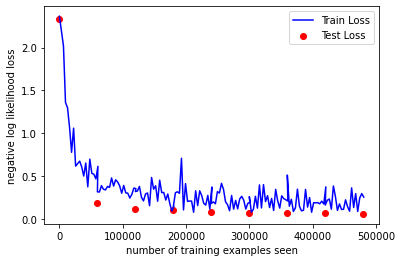

In [10]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

## Plot test result

/tmp/ipykernel_19121/1774042229.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


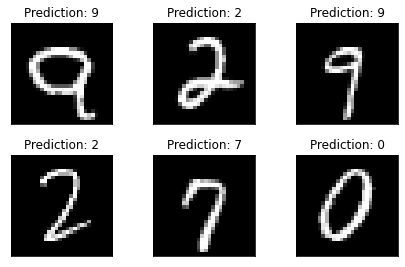

In [11]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
  output = network(example_data)
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()